In [48]:
import pickle
import diptest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_data
from utils import normalization, renormalization
from utils import introduce_missing_data

from sklearn.utils import shuffle
from scipy.stats import spearmanr

from knnxkde import KNNxKDE

## Appendix A -- Qualitative evaluation of the hyperparameters

### Appendix A.1. Softmax temperature $\tau$

In [49]:
original_data = load_data('2d_sine')
original_data = shuffle(original_data)

miss_data = introduce_missing_data(
    original_data=original_data,
    miss_rate=0.2,
    mode='full_mcar',
    data_name='2d_sine',
)

norm_miss_data, norm_params = normalization(miss_data)
norm_original_data, _ = normalization(original_data, parameters=norm_params)

In [50]:
MY_LIST_TAUS = [10.0, 500.0, 25000.0]

knnxkde_tau1 = KNNxKDE(h=0.03, tau=1.0/MY_LIST_TAUS[0], metric='nan_std_eucl')
norm_imputed_samples_tau1 = knnxkde_tau1.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_tau2 = KNNxKDE(h=0.03, tau=1.0/MY_LIST_TAUS[1], metric='nan_std_eucl')
norm_imputed_samples_tau2 = knnxkde_tau2.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_tau3 = KNNxKDE(h=0.03, tau=1.0/MY_LIST_TAUS[2], metric='nan_std_eucl')
norm_imputed_samples_tau3 = knnxkde_tau3.impute_samples(norm_miss_data, nb_draws=10000)

rand_key = (np.int64(276), 0) and data is [ 5.2937026 -0.8922125]


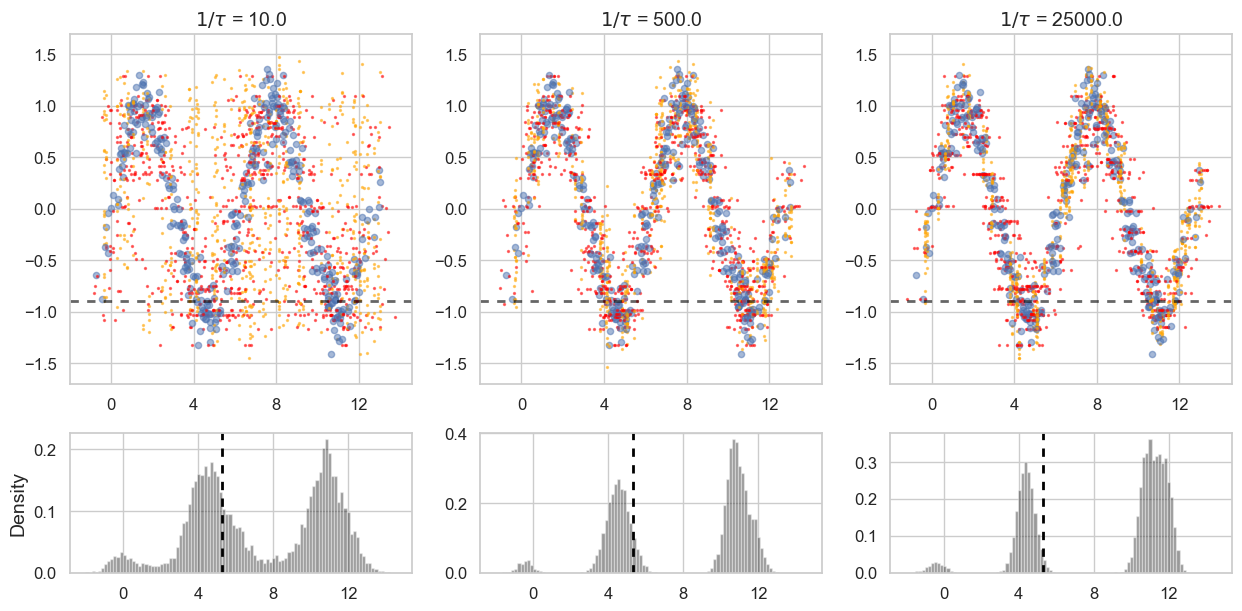

In [51]:
Nss = 10  # nb sub-samples for plotting purposes
rand_key = (0, 1)
while rand_key[1]==1:
    rand_idx = np.random.choice(len(norm_imputed_samples_tau1.keys()))
    rand_key = list(norm_imputed_samples_tau1.keys())[rand_idx]  # fixed random cell for all histograms
print(f'rand_key = {rand_key} and data is {original_data[rand_key[0]]}')

fig, ax = plt.subplots(2, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [5, 2]})
for i0 in range(3):
    if i0==0:
        temp_sample_dict = norm_imputed_samples_tau1
    elif i0==1:
        temp_sample_dict = norm_imputed_samples_tau2
    elif i0==2:
        temp_sample_dict = norm_imputed_samples_tau3
    
    for i1 in range(original_data.shape[0]):
        if np.isnan(miss_data[i1, 0]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 0)], size=Nss, replace=False)
            m1 = norm_params['min_val'][0]
            m2 = norm_params['max_val'][0]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            y_scatter = [miss_data[i1, 1]] * Nss
            ax[0, i0].scatter(cur_sample, y_scatter, c='red', s=2.0, alpha=0.5)
        elif np.isnan(miss_data[i1, 1]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 1)], size=Nss, replace=False)
            m1 = norm_params['min_val'][1]
            m2 = norm_params['max_val'][1]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            x_scatter = [miss_data[i1, 0]] * Nss
            ax[0, i0].scatter(x_scatter, cur_sample, c='orange', s=2.0, alpha=0.5)
        else:
            x_scatter = miss_data[i1, 0]
            y_scatter = miss_data[i1, 1]
            ax[0, i0].scatter(x_scatter, y_scatter, c='C0', s=20.0, alpha=0.5)
    
    ax[0, i0].axhline(miss_data[rand_key[0], 1], ls=(0, (3, 3)), c='black', lw=2, alpha=0.6)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[0, i0].set_ylim(-1.7, 1.7)
    ax[0, i0].set_title(fr'$1 / \tau$ = {MY_LIST_TAUS[i0]}', size=14)
    ax[0, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[0, i0].tick_params(labelsize=12)
    
    if rand_key[1]==0:
        m1 = norm_params['min_val'][0]
        m2 = norm_params['max_val'][0]
    elif rand_key[1]==1:
        m1 = norm_params['min_val'][1]
        m2 = norm_params['max_val'][1]
    
    cur_sample = temp_sample_dict[rand_key] * (m2 + 1e-6) + m1
    ax[1, i0].hist(cur_sample, bins=100, range=[-2.0, 4.0*np.pi+2.0], color='black', alpha=0.4, density=True)
    ax[1, i0].axvline(original_data[rand_key[0], 0], ls=(0, (3, 3)), c='black', lw=2)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[1, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[1, i0].tick_params(labelsize=12)

ax[1, 0].set_ylabel('Density', size=14)
plt.savefig('figures/appA_tau.pdf')
plt.show()

### Appendix A.2. Gaussian Kernel bandwidth $h$

In [52]:
original_data = load_data('2d_sine')
original_data = shuffle(original_data)

miss_data = introduce_missing_data(
    original_data=original_data,
    miss_rate=0.2,
    mode='full_mcar',
    data_name='2d_sine',
)

norm_miss_data, norm_params = normalization(miss_data)
norm_original_data, _ = normalization(original_data, parameters=norm_params)

In [53]:
MY_LIST_HS = [0.01, 0.03, 0.10]

knnxkde_h1 = KNNxKDE(h=MY_LIST_HS[0], tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_h1 = knnxkde_h1.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_h2 = KNNxKDE(h=MY_LIST_HS[1], tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_h2 = knnxkde_h2.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_h3 = KNNxKDE(h=MY_LIST_HS[2], tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_h3 = knnxkde_h3.impute_samples(norm_miss_data, nb_draws=10000)

rand_key = (np.int64(473), 0) and data is [ 4.739618  -0.9379147]


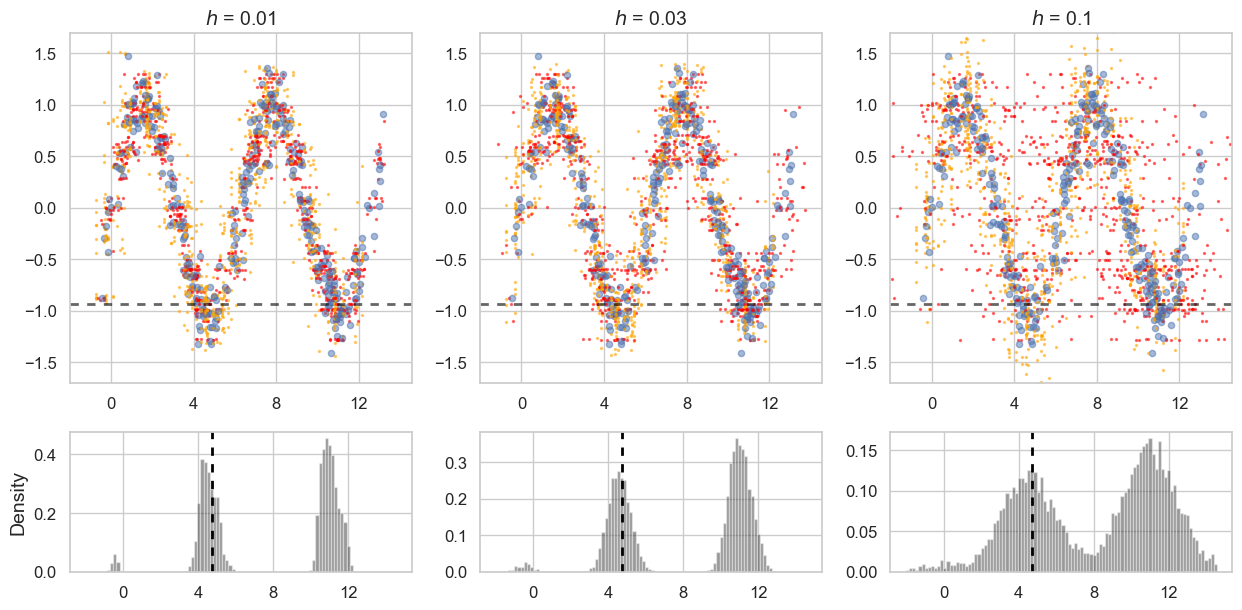

In [54]:
Nss = 10  # nb sub-samples for plotting purposes
rand_key = (0, 1)
while rand_key[1]==1:
    rand_idx = np.random.choice(len(norm_imputed_samples_h1.keys()))
    rand_key = list(norm_imputed_samples_h1.keys())[rand_idx]  # fixed random cell for all histograms
print(f'rand_key = {rand_key} and data is {original_data[rand_key[0]]}')

fig, ax = plt.subplots(2, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [5, 2]})
for i0 in range(3):
    if i0==0:
        temp_sample_dict = norm_imputed_samples_h1
    elif i0==1:
        temp_sample_dict = norm_imputed_samples_h2
    elif i0==2:
        temp_sample_dict = norm_imputed_samples_h3
    
    for i1 in range(original_data.shape[0]):
        if np.isnan(miss_data[i1, 0]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 0)], size=Nss, replace=False)
            m1 = norm_params['min_val'][0]
            m2 = norm_params['max_val'][0]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            y_scatter = [miss_data[i1, 1]] * Nss
            ax[0, i0].scatter(cur_sample, y_scatter, c='red', s=2.0, alpha=0.5)
        elif np.isnan(miss_data[i1, 1]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 1)], size=Nss, replace=False)
            m1 = norm_params['min_val'][1]
            m2 = norm_params['max_val'][1]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            x_scatter = [miss_data[i1, 0]] * Nss
            ax[0, i0].scatter(x_scatter, cur_sample, c='orange', s=2.0, alpha=0.5)
        else:
            x_scatter = miss_data[i1, 0]
            y_scatter = miss_data[i1, 1]
            ax[0, i0].scatter(x_scatter, y_scatter, c='C0', s=20.0, alpha=0.5)
    
    ax[0, i0].axhline(miss_data[rand_key[0], 1], ls=(0, (3, 3)), c='black', lw=2, alpha=0.6)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[0, i0].set_ylim(-1.7, 1.7)
    ax[0, i0].set_title(fr'$h$ = {MY_LIST_HS[i0]}', size=14)
    ax[0, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[0, i0].tick_params(labelsize=12)
    
    if rand_key[1]==0:
        m1 = norm_params['min_val'][0]
        m2 = norm_params['max_val'][0]
    elif rand_key[1]==1:
        m1 = norm_params['min_val'][1]
        m2 = norm_params['max_val'][1]
    
    cur_sample = temp_sample_dict[rand_key] * (m2 + 1e-6) + m1
    ax[1, i0].hist(cur_sample, bins=100, range=[-2.0, 4.0*np.pi+2.0], color='black', alpha=0.4, density=True)
    ax[1, i0].axvline(original_data[rand_key[0], 0], ls=(0, (3, 3)), c='black', lw=2)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[1, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[1, i0].tick_params(labelsize=12)

ax[1, 0].set_ylabel('Density', size=14)
plt.savefig('figures/appA_h.pdf')
plt.show()

### Appendix A.3. Number of samples $N_{\rm draws}$

In [55]:
original_data = load_data('2d_sine')
original_data = shuffle(original_data)

miss_data = introduce_missing_data(
    original_data=original_data,
    miss_rate=0.2,
    mode='full_mcar',
    data_name='2d_sine',
)

norm_miss_data, norm_params = normalization(miss_data)
norm_original_data, _ = normalization(original_data, parameters=norm_params)

In [56]:
MY_LIST_NBDRAWS = [200, 2000, 20000]

knnxkde_nbdraws1 = KNNxKDE(h=0.03, tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_nbdraws1 = knnxkde_nbdraws1.impute_samples(norm_miss_data, nb_draws=MY_LIST_NBDRAWS[0])

knnxkde_nbdraws2 = KNNxKDE(h=0.03, tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_nbdraws2 = knnxkde_nbdraws2.impute_samples(norm_miss_data, nb_draws=MY_LIST_NBDRAWS[1])

knnxkde_nbdraws3 = KNNxKDE(h=0.03, tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_nbdraws3 = knnxkde_nbdraws3.impute_samples(norm_miss_data, nb_draws=MY_LIST_NBDRAWS[2])

rand_key = (np.int64(271), 0) and data is [1.4269625 0.8772507]


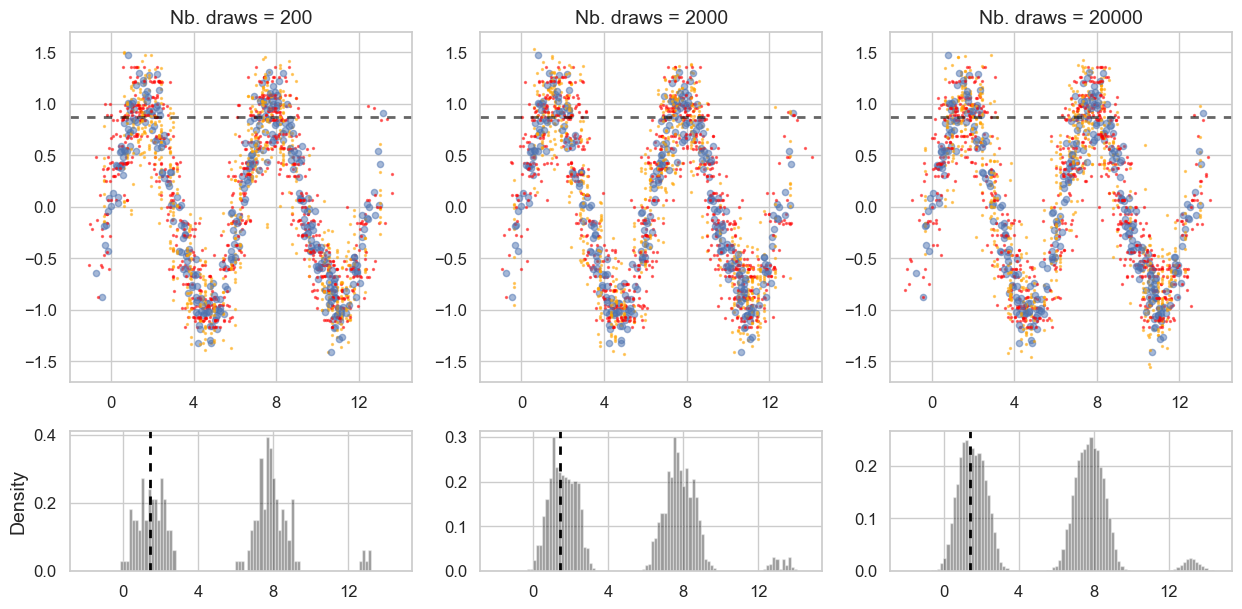

In [57]:
Nss = 10  # nb sub-samples for plotting purposes
rand_key = (0, 1)
while rand_key[1]==1:
    rand_idx = np.random.choice(len(norm_imputed_samples_nbdraws1.keys()))
    rand_key = list(norm_imputed_samples_nbdraws1.keys())[rand_idx]  # fixed random cell for all histograms
print(f'rand_key = {rand_key} and data is {original_data[rand_key[0]]}')

fig, ax = plt.subplots(2, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [5, 2]})
for i0 in range(3):
    if i0==0:
        temp_sample_dict = norm_imputed_samples_nbdraws1
    elif i0==1:
        temp_sample_dict = norm_imputed_samples_nbdraws2
    elif i0==2:
        temp_sample_dict = norm_imputed_samples_nbdraws3
    
    for i1 in range(original_data.shape[0]):
        if np.isnan(miss_data[i1, 0]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 0)], size=Nss, replace=False)
            m1 = norm_params['min_val'][0]
            m2 = norm_params['max_val'][0]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            y_scatter = [miss_data[i1, 1]] * Nss
            ax[0, i0].scatter(cur_sample, y_scatter, c='red', s=2.0, alpha=0.5)
        elif np.isnan(miss_data[i1, 1]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 1)], size=Nss, replace=False)
            m1 = norm_params['min_val'][1]
            m2 = norm_params['max_val'][1]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            x_scatter = [miss_data[i1, 0]] * Nss
            ax[0, i0].scatter(x_scatter, cur_sample, c='orange', s=2.0, alpha=0.5)
        else:
            x_scatter = miss_data[i1, 0]
            y_scatter = miss_data[i1, 1]
            ax[0, i0].scatter(x_scatter, y_scatter, c='C0', s=20.0, alpha=0.5)
    
    ax[0, i0].axhline(miss_data[rand_key[0], 1], ls=(0, (3, 3)), c='black', lw=2, alpha=0.6)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[0, i0].set_ylim(-1.7, 1.7)
    ax[0, i0].set_title(fr'Nb. draws = {MY_LIST_NBDRAWS[i0]}', size=14)
    ax[0, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[0, i0].tick_params(labelsize=12)
    
    if rand_key[1]==0:
        m1 = norm_params['min_val'][0]
        m2 = norm_params['max_val'][0]
    elif rand_key[1]==1:
        m1 = norm_params['min_val'][1]
        m2 = norm_params['max_val'][1]
    
    cur_sample = temp_sample_dict[rand_key] * (m2 + 1e-6) + m1
    ax[1, i0].hist(cur_sample, bins=100, range=[-2.0, 4.0*np.pi+2.0], color='black', alpha=0.4, density=True)
    ax[1, i0].axvline(original_data[rand_key[0], 0], ls=(0, (3, 3)), c='black', lw=2)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[1, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[1, i0].tick_params(labelsize=12)

ax[1, 0].set_ylabel('Density', size=14)
plt.savefig('figures/appA_nbdraws.pdf')
plt.show()

## Appendix B -- Presentation of the data sets

Quick and dirty script to generate appendix tables of data sets correlation coeffs

In [58]:
LIST_DATASETS = [
    '2d_linear',
    '2d_sine',
    '2d_ring',
    'geyser',
    'penguin',
    'pollen',
    'planets',
    'abalone',
    'sulfur',
    'gaussians',
    'wine_red',
    'wine_white',
    'japanese_vowels',
    'sylvine',
    'breast',
]


=== Dataset Correlation & Modality Summary ===

            Dataset  Features  Pearson μ  Pearson σ  Spearman μ  Spearman σ  \
0         2d_linear         2      0.950      0.000       0.952       0.000   
1           2d_sine         2      0.323      0.000       0.325       0.000   
2           2d_ring         2      0.012      0.000       0.014       0.000   
3            geyser         2      0.901      0.000       0.778       0.000   
4           penguin         4      0.569      0.192       0.546       0.193   
5            pollen         5      0.297      0.240       0.287       0.236   
6           planets         6      0.501      0.200       0.534       0.186   
7           abalone         7      0.891      0.058       0.941       0.031   
8            sulfur         7      0.239      0.255       0.235       0.236   
9         gaussians         8      0.588      0.246       0.499       0.203   
10         wine_red        11      0.200      0.187       0.214       0.193   
11 

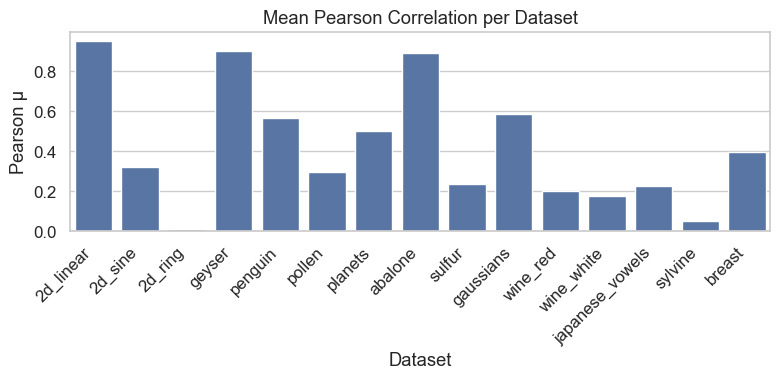

In [59]:
results = []

for data_name in LIST_DATASETS:
    original_data = load_data(data_name)
    n, d = original_data.shape

    corr_pearson = np.abs(np.corrcoef(original_data, rowvar=False))
    corr_spearman = np.abs(spearmanr(original_data).correlation)

    list_pearson, list_spearman = [], []
    if d == 2:
        list_pearson.append(corr_pearson[0, 1])
        list_spearman.append(corr_spearman)
    else:
        for i1 in range(1, d):
            for i2 in range(0, i1):
                list_pearson.append(corr_pearson[i1, i2])
                list_spearman.append(corr_spearman[i1, i2])

    pearson_mu, pearson_sigma = np.mean(list_pearson), np.std(list_pearson)
    spearman_mu, spearman_sigma = np.mean(list_spearman), np.std(list_spearman)

    dip_pvals = [diptest.diptest(original_data[:, i])[1] for i in range(d)]
    dip_mu, dip_sigma = np.mean(dip_pvals), np.std(dip_pvals)

    results.append({
        "Dataset": data_name,
        "Features": d,
        "Pearson μ": round(pearson_mu, 3),
        "Pearson σ": round(pearson_sigma, 3),
        "Spearman μ": round(spearman_mu, 3),
        "Spearman σ": round(spearman_sigma, 3),
        "Dip μ": round(dip_mu, 3),
        "Dip σ": round(dip_sigma, 3)
    })

df = pd.DataFrame(results)
print("\n=== Dataset Correlation & Modality Summary ===\n")
print(df)

df.to_csv("dataset_correlation_summary.csv", index=False)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Dataset", y="Pearson μ", capsize=0.2)
plt.xticks(rotation=45, ha="right")
plt.title("Mean Pearson Correlation per Dataset")
plt.tight_layout()
plt.savefig("pearson_summary.png", dpi=300)
plt.show()


In [61]:
for k in range(len(LIST_DATASETS)):
    data_name = LIST_DATASETS[k]
    original_data = load_data(data_name)
    N, D = original_data.shape
    norm_original_data, _ = normalization(original_data)
    list_dip_stat = []
    list_dip_pval = []
    for d in range(D):
        dip, pval = diptest.diptest(original_data[:, d])
        list_dip_stat.append(dip)
        list_dip_pval.append(pval)
    mu = np.mean(list_dip_pval)
    sigma = np.std(list_dip_pval)
    mini = np.min(list_dip_pval)
    maxi = np.max(list_dip_pval)
    print(data_name)
    print(f'{mu:.3f} +/- {sigma:.3f} range = [{mini:.3f} ; {maxi:.3f}]')
    mu = np.mean(list_dip_stat)
    sigma = np.std(list_dip_stat)
    mini = np.min(list_dip_stat)
    maxi = np.max(list_dip_stat)
    print(f'{mu:.3f} +/- {sigma:.3f} range = [{mini:.3f} ; {maxi:.3f}]')

2d_linear
0.605 +/- 0.268 range = [0.337 ; 0.872]
0.016 +/- 0.003 range = [0.013 ; 0.018]
2d_sine
0.437 +/- 0.436 range = [0.001 ; 0.872]
0.023 +/- 0.010 range = [0.013 ; 0.033]
2d_ring
0.000 +/- 0.000 range = [0.000 ; 0.001]
0.037 +/- 0.004 range = [0.033 ; 0.041]
geyser
0.001 +/- 0.001 range = [0.000 ; 0.002]
0.067 +/- 0.025 range = [0.041 ; 0.092]
penguin
0.226 +/- 0.259 range = [0.002 ; 0.665]
0.027 +/- 0.007 range = [0.018 ; 0.037]
pollen
0.953 +/- 0.066 range = [0.826 ; 1.000]
0.004 +/- 0.001 range = [0.003 ; 0.005]
planets
0.390 +/- 0.438 range = [0.000 ; 0.994]
0.024 +/- 0.017 range = [0.009 ; 0.059]
abalone
0.337 +/- 0.398 range = [0.000 ; 0.966]
0.011 +/- 0.007 range = [0.004 ; 0.026]
sulfur
0.303 +/- 0.435 range = [0.000 ; 0.994]
0.028 +/- 0.022 range = [0.002 ; 0.059]
gaussians
0.125 +/- 0.331 range = [0.000 ; 1.000]
0.047 +/- 0.046 range = [0.002 ; 0.152]
wine_red
0.022 +/- 0.047 range = [0.000 ; 0.143]
0.023 +/- 0.009 range = [0.012 ; 0.041]
wine_white
0.010 +/- 0.024 ran

# Appendix E -- Experimental computation time

We fix `MISSING_SCENARIO = 'full_mcar'` and `MISS_RATE = 0.2`   
Then we repeat `NB_REPEAT=3` times every imputation method and store the compute time  
Note that the $k$NN$\times$KDE, the $k$NN-Imputer, MissForest, SoftImpute, and GAIN run 7 times become they have hyper-parameters.

In [62]:
LIST_DATASETS = [
    '2d_linear',
    '2d_sine',
    '2d_ring',
    'geyser',
    'penguin',
    'pollen',
    'planets',
    'abalone',
    'sulfur',
    'gaussians',
    'wine_red',
    'wine_white',
    'japanese_vowels',
    'sylvine',
    'breast',
]

LIST_METHODS_RMSE = [
    'knnxkde',
    'knnimputer',
    'missforest',
    'softimpute',
    'gain',
    'mice',
    'mean',
    'median',
]


=== Full_MCAR Summary Table ===

            Dataset       Shape      Method     Mean    Std
0         2d_linear    (500, 2)     knnxkde    0.281  0.015
1         2d_linear    (500, 2)  knnimputer    0.026  0.001
2         2d_linear    (500, 2)  missforest    0.334  0.026
3         2d_linear    (500, 2)  softimpute    0.744  0.007
4           2d_sine    (500, 2)     knnxkde    0.267  0.013
5           2d_sine    (500, 2)  knnimputer    0.026  0.001
6           2d_sine    (500, 2)  missforest    1.161  0.003
7           2d_sine    (500, 2)  softimpute    0.733  0.005
8           2d_ring    (500, 2)     knnxkde    0.327  0.043
9           2d_ring    (500, 2)  knnimputer    0.027  0.000
10          2d_ring    (500, 2)  missforest    1.172  0.034
11          2d_ring    (500, 2)  softimpute    0.765  0.015
12           geyser    (272, 2)     knnxkde    0.153  0.006
13           geyser    (272, 2)  knnimputer    0.014  0.000
14           geyser    (272, 2)  missforest    0.238  0.029
15    

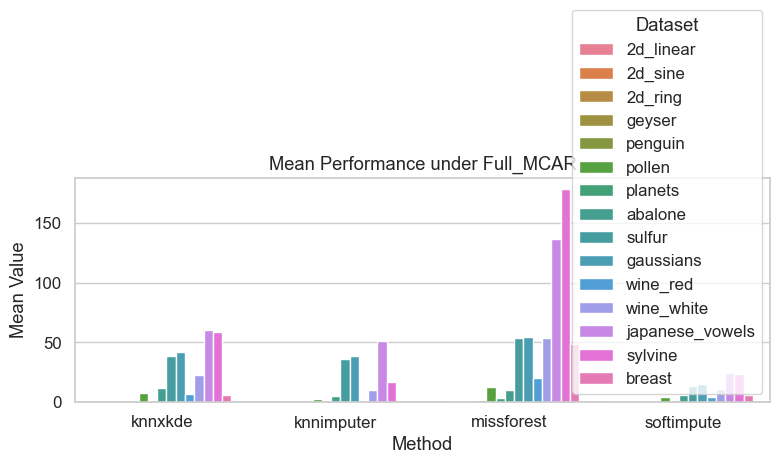

In [67]:
results = []

for data_name in LIST_DATASETS:
    original_data = load_data(data_name)
    n, d = original_data.shape

    array_t = np.zeros((len(LIST_METHODS_RMSE), 3))
    for i in range(3):
        path_name = f'output/full_mcar/_time/time_{data_name}_repeat{i}.npy'
        array_t[:, i] = np.load(path_name)[1:]

    mu = np.mean(array_t, axis=1)
    sigma = np.std(array_t, axis=1)

    for j in range(min(4, len(LIST_METHODS_RMSE))):
        results.append({
            "Dataset": data_name,
            "Shape": f"({n}, {d})",
            "Method": LIST_METHODS_RMSE[j],
            "Mean": round(mu[j], 3),
            "Std": round(sigma[j], 3)
        })

df = pd.DataFrame(results)
print("\n=== Full_MCAR Summary Table ===\n")
print(df)

df.to_csv("full_mcar_summary.csv", index=False)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Method", y="Mean", hue="Dataset", capsize=0.2)
plt.title("Mean Performance under Full_MCAR")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.savefig("full_mcar_results.png", dpi=300)
plt.show()


In [64]:
temp = np.load(path_name)

In [65]:
temp

array([9.86599922e-03, 6.13171077e+00, 2.80492067e-01, 4.79304578e+01,
       5.73409104e+00, 1.87985322e+01, 2.19760895e-01, 8.26120377e-04,
       1.76477432e-03])